In [97]:
import pandas as pd
import numpy as np
from scipy import stats


In [98]:
df =pd.read_csv('C:\\Users\\chabi\\Downloads\\אמנות\Churn_table (1).csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


<>:1: SyntaxWarning:

invalid escape sequence '\C'

<>:1: SyntaxWarning:

invalid escape sequence '\C'

C:\Users\chabi\AppData\Local\Temp\ipykernel_31712\4266467881.py:1: SyntaxWarning:

invalid escape sequence '\C'



In [99]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [100]:
# First, create age bins
def categorize_age(age):
    if 26 <= age <= 40:
        return 'Young Adults'
    elif 41 <= age <= 55:
        return 'Middle-Aged Adults'
    elif 56 <= age <= 73:
        return 'Older Adults'
    else:
        return 'Other'

# Create the age categories
df['Age_Category'] = df['Customer_Age'].apply(categorize_age)

In [101]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Binary,Age_Category
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,Middle-Aged Adults
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,Middle-Aged Adults
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,Middle-Aged Adults
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,Young Adults
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,Young Adults


In [102]:
numerical_cols = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                 'Total_Trans_Amt', 'Total_Trans_Ct',
                 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

labels = ['Very Low', 'Low', 'Medium Low', 'Medium High', 'High', 'Very High']

for col in numerical_cols:
    
    df[f'{col}_binned'] = pd.cut(df[col], bins=6, labels=labels)
    
    

In [103]:
# Combine original categorical columns and binned numerical columns
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status','Contacts_Count_12_mon','Months_Inactive_12_mon', 
                   'Income_Category', 'Card_Category', 'Age_Category']

numerical_cols = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                 'Total_Trans_Amt', 'Total_Trans_Ct',
                 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Get all binned column names
binned_cols = [f'{col}_binned' for col in numerical_cols]

# Combine all categorical columns
all_cats = categorical_cols + binned_cols

# Perform chi-square tests for all categorical variables
for col in all_cats:
    print(f"\n=== Chi-square test for {col} ===")
    
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Attrition_Flag'])
    print("\nContingency Table:")
    print(contingency_table)
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4e}")
    print(f"Degrees of freedom: {dof}")
    
    if p_value < 0.05:
        print("Conclusion: There is a significant relationship (p < 0.05)")
    else:
        print("Conclusion: No significant relationship (p >= 0.05)")


=== Chi-square test for Gender ===

Contingency Table:
Attrition_Flag     0    1
Gender                   
F               4428  930
M               4072  697

Chi-square statistic: 13.8656
p-value: 1.9636e-04
Degrees of freedom: 1
Conclusion: There is a significant relationship (p < 0.05)

=== Chi-square test for Education_Level ===

Contingency Table:
Attrition_Flag      0    1
Education_Level           
College           859  154
Doctorate         356   95
Graduate         2641  487
High School      1707  306
Post-Graduate     424   92
Uneducated       1250  237
Unknown          1263  256

Chi-square statistic: 12.5112
p-value: 5.1489e-02
Degrees of freedom: 6
Conclusion: No significant relationship (p >= 0.05)

=== Chi-square test for Marital_Status ===

Contingency Table:
Attrition_Flag     0    1
Marital_Status           
Divorced         627  121
Married         3978  709
Single          3275  668
Unknown          620  129

Chi-square statistic: 6.0561
p-value: 1.0891e-01
Degre

In [104]:

# Perform t-test with 0/1 values
existing_customers = df[df['Attrition_Flag'] == 0]['Total_Revolving_Bal']
attrited_customers = df[df['Attrition_Flag'] == 1]['Total_Revolving_Bal']

# Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(existing_customers, attrited_customers, equal_var=False)

print("T-test Results for Total Revolving Balance:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Get descriptive statistics
print("\nDescriptive Statistics:")
print("\nExisting Customers (0):")
print(f"Mean: {existing_customers.mean():.4f}")
print(f"Std: {existing_customers.std():.4f}")
print(f"Count: {len(existing_customers)}")

print("\nAttrited Customers (1):")
print(f"Mean: {attrited_customers.mean():.4f}")
print(f"Std: {attrited_customers.std():.4f}")
print(f"Count: {len(attrited_customers)}")

# Effect size (Cohen's d)
n1, n2 = len(existing_customers), len(attrited_customers)
pooled_std = np.sqrt(((n1-1)*existing_customers.std()**2 + (n2-1)*attrited_customers.std()**2) / (n1+n2-2))
cohens_d = (existing_customers.mean() - attrited_customers.mean()) / pooled_std

print(f"\nCohen's d effect size: {cohens_d:.4f}")

stat, p_value = stats.mannwhitneyu(existing_customers, attrited_customers, alternative='two-sided')

print("\nMann-Whitney U Test Results for Total Revolving Balance:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Calculate median for both groups for interpretation
print("\nMedian values:")
print(f"Existing Customers: {existing_customers.median():.2f}")
print(f"Attrited Customers: {attrited_customers.median():.2f}")

T-test Results for Total Revolving Balance:
t-statistic: 24.0473
p-value: 7.0897e-113

Descriptive Statistics:

Existing Customers (0):
Mean: 1256.6041
Std: 757.7454
Count: 8500

Attrited Customers (1):
Mean: 672.8230
Std: 921.3856
Count: 1627

Cohen's d effect size: 0.7424

Mann-Whitney U Test Results for Total Revolving Balance:
Statistic: 9510716.0000
p-value: 1.9157e-129

Median values:
Existing Customers: 1364.00
Attrited Customers: 0.00


In [105]:


# Perform t-test with 0/1 values
existing_customers = df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio']
attrited_customers = df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio']

# Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(existing_customers, attrited_customers, equal_var=False)

print("T-test Results for Avg Utilization Ratio:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Get descriptive statistics
print("\nDescriptive Statistics:")
print("\nExisting Customers (0):")
print(f"Mean: {existing_customers.mean():.4f}")
print(f"Std: {existing_customers.std():.4f}")
print(f"Count: {len(existing_customers)}")

print("\nAttrited Customers (1):")
print(f"Mean: {attrited_customers.mean():.4f}")
print(f"Std: {attrited_customers.std():.4f}")
print(f"Count: {len(attrited_customers)}")

# Effect size (Cohen's d)
n1, n2 = len(existing_customers), len(attrited_customers)
pooled_std = np.sqrt(((n1-1)*existing_customers.std()**2 + (n2-1)*attrited_customers.std()**2) / (n1+n2-2))
cohens_d = (existing_customers.mean() - attrited_customers.mean()) / pooled_std

print(f"\nCohen's d effect size: {cohens_d:.4f}")

stat, p_value = stats.mannwhitneyu(existing_customers, attrited_customers, alternative='two-sided')

print("\nMann-Whitney U Test Results for Avg Utilization Ratio:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Calculate median for both groups for interpretation
print("\nMedian values:")
print(f"Existing Customers: {existing_customers.median():.2f}")
print(f"Attrited Customers: {attrited_customers.median():.2f}")

T-test Results for Avg Utilization Ratio:
t-statistic: 18.6228
p-value: 2.7821e-72

Descriptive Statistics:

Existing Customers (0):
Mean: 0.2964
Std: 0.2726
Count: 8500

Attrited Customers (1):
Mean: 0.1625
Std: 0.2645
Count: 1627

Cohen's d effect size: 0.4937

Mann-Whitney U Test Results for Avg Utilization Ratio:
Statistic: 9509093.5000
p-value: 2.8691e-129

Median values:
Existing Customers: 0.21
Attrited Customers: 0.00


In [106]:

def bayesian_proportion_analysis(successes, trials, alpha_prior=1, beta_prior=1):
    """Compute Bayesian posterior for a proportion"""
    alpha_post = alpha_prior + successes
    beta_post = beta_prior + (trials - successes)
    mean = alpha_post / (alpha_post + beta_post)
    interval = stats.beta.interval(0.95, alpha_post, beta_post)
    return mean, interval

def analyze_group_bayesian(data, gender, marital_status):
    # Filter data for specific group
    group_data = data[(data['Gender'] == gender) & 
                     (data['Marital_Status'] == marital_status)]
    
    print(f"\n=== Bayesian Analysis for {gender} - {marital_status} ===")
    print(f"Sample size: {len(group_data)}")
    
    # Analyze each education level
    for edu in sorted(group_data['Education_Level'].unique()):
        edu_data = group_data[group_data['Education_Level'] == edu]
        successes = edu_data['Attrition_Flag'].sum()
        trials = len(edu_data)
        
        if trials == 0:
            continue
            
        mean, (ci_low, ci_high) = bayesian_proportion_analysis(successes, trials)
        
        print(f"\n{edu}:")
        print(f"N = {trials}, Attritions = {successes}")
        print(f"Mean attrition rate: {mean*100:.2f}%")
        print(f"95% Credible interval: [{ci_low*100:.2f}%, {ci_high*100:.2f}%]")

# Run analysis for each group
for gender in ['M', 'F']:
    for marital in df['Marital_Status'].unique():
        analyze_group_bayesian(df, gender, marital)


=== Bayesian Analysis for M - Married ===
Sample size: 2236

College:
N = 228, Attritions = 33
Mean attrition rate: 14.78%
95% Credible interval: [10.51%, 19.64%]

Doctorate:
N = 79, Attritions = 14
Mean attrition rate: 18.52%
95% Credible interval: [10.89%, 27.62%]

Graduate:
N = 701, Attritions = 82
Mean attrition rate: 11.81%
95% Credible interval: [9.53%, 14.29%]

High School:
N = 469, Attritions = 59
Mean attrition rate: 12.74%
95% Credible interval: [9.88%, 15.89%]

Post-Graduate:
N = 117, Attritions = 17
Mean attrition rate: 15.13%
95% Credible interval: [9.30%, 22.06%]

Uneducated:
N = 314, Attritions = 49
Mean attrition rate: 15.82%
95% Credible interval: [12.02%, 20.04%]

Unknown:
N = 328, Attritions = 43
Mean attrition rate: 13.33%
95% Credible interval: [9.89%, 17.20%]

=== Bayesian Analysis for M - Single ===
Sample size: 1818

College:
N = 179, Attritions = 33
Mean attrition rate: 18.78%
95% Credible interval: [13.45%, 24.77%]

Doctorate:
N = 85, Attritions = 12
Mean att

In [107]:
import plotly.express as px
import pandas as pd

def create_combined_extreme_treemap(data):
    # Define the extreme groups with the same conditions
    extreme_conditions = (
        # High risk groups
        ((data['Gender'] == 'M') & (data['Marital_Status'] == 'Unknown') & 
         (data['Education_Level'].isin(['Post-Graduate', 'Uneducated']))) |
        ((data['Gender'].isin(['F'])) & (data['Education_Level'] == 'Doctorate') & 
         (data['Marital_Status'].isin(['Married', 'Single']))) |
        # Low risk groups
        ((data['Gender'] == 'M') & (data['Marital_Status'] == 'Unknown') & 
         (data['Education_Level'] == 'College')) |
        ((data['Gender'] == 'M') & (data['Marital_Status'] == 'Divorced') & 
         (data['Education_Level'] == 'Uneducated'))
    )
    
    # Filter data
    filtered_data = data[extreme_conditions].copy()
    
    # Calculate attrition rates and group data
    grouped = filtered_data.groupby(['Gender', 'Marital_Status', 'Education_Level']).agg({
        'Attrition_Flag': ['count', 'sum']
    }).reset_index()
    
    grouped.columns = ['Gender', 'Marital_Status', 'Education_Level', 'Total', 'Attrited']
    grouped['Attrition_Rate'] = (grouped['Attrited'] / grouped['Total'] * 100).round(2)
    
    # Create treemap
    fig = px.treemap(
        grouped,
        path=[px.Constant("Extreme Attrition Groups"), 'Gender', 'Marital_Status', 'Education_Level'],
        values='Total',
        color='Attrition_Rate',
        color_continuous_scale='RdBu',  # Red for high risk, Blue for low risk
        hover_data=['Attrition_Rate', 'Total', 'Attrited'],
        title='Extreme Attrition Groups (Red: High Risk, Blue: Low Risk)'
    )
    
    fig.update_layout(
        width=1000,
        height=600,
        title_x=0.5,
        title_font_size=16
    )
    
    fig.update_traces(
        hovertemplate="""
        <b>%{label}</b><br>
        Attrition Rate: %{customdata[0]:.1f}%<br>
        Total Customers: %{customdata[1]}<br>
        Attrited: %{customdata[2]}<br>
        <extra></extra>
        """
    )
    
    fig.show()

# Create visualization
create_combined_extreme_treemap(df)

  0%|          | 0/1000000 [00:00<?, ?it/s]

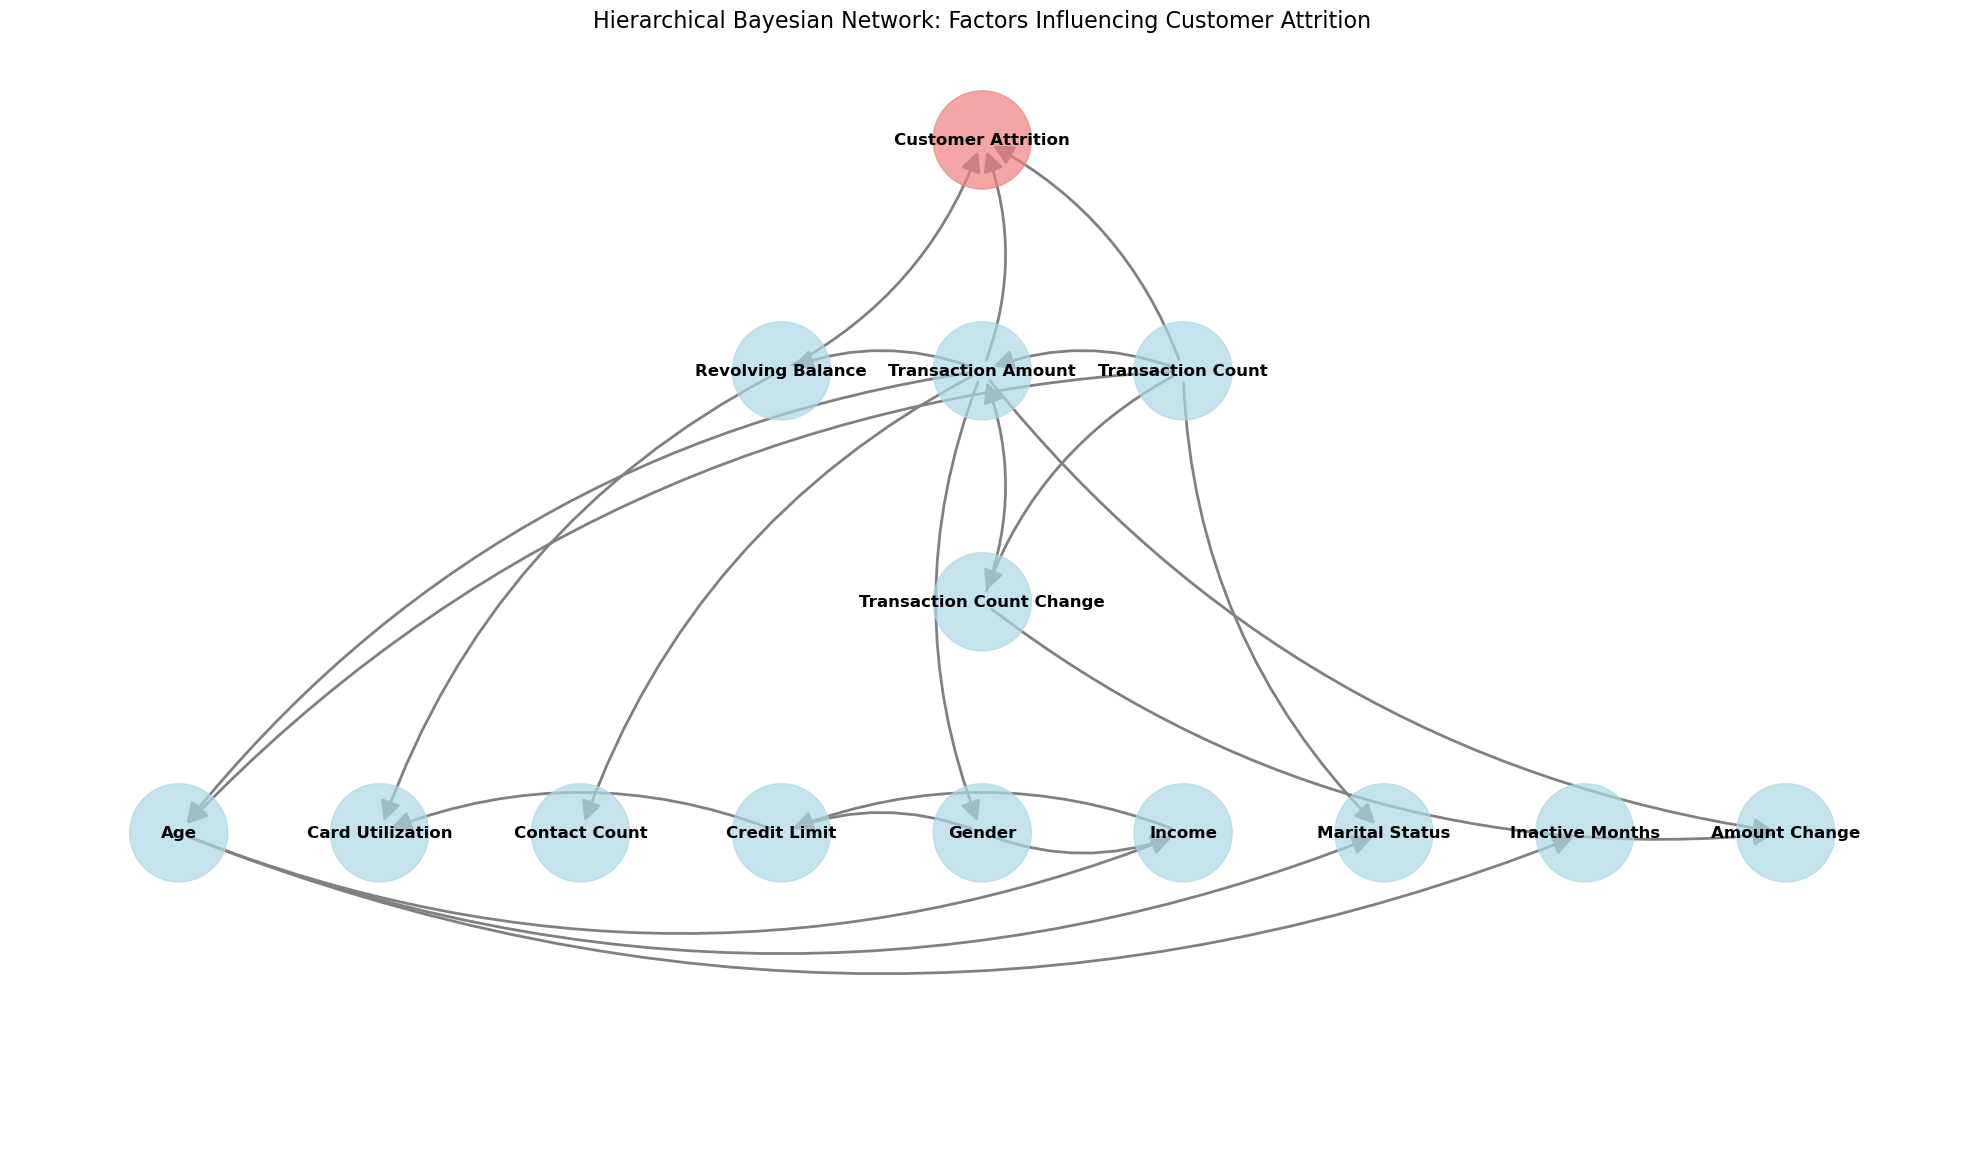


Hierarchical Relationships in the Network:
----------------------------------------
Transaction Count → Transaction Amount
Transaction Count → Customer Attrition
Transaction Count → Transaction Count Change
Transaction Count → Marital Status
Transaction Count → Age
Transaction Amount → Amount Change
Transaction Amount → Customer Attrition
Transaction Amount → Contact Count
Transaction Amount → Gender
Transaction Amount → Age
Transaction Amount → Revolving Balance
Transaction Count Change → Amount Change
Transaction Count Change → Transaction Amount
Age → Income
Age → Marital Status
Age → Inactive Months
Gender → Income
Gender → Credit Limit
Revolving Balance → Card Utilization
Revolving Balance → Customer Attrition
Income → Credit Limit
Credit Limit → Card Utilization


In [113]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
import networkx as nx
import matplotlib.pyplot as plt

# Select significant variables
selected_cols = [
    'Total_Trans_Ct_binned',          
    'Total_Trans_Amt_binned',         
    'Total_Revolving_Bal_binned',     
    'Total_Ct_Chng_Q4_Q1_binned',    
    'Contacts_Count_12_mon',          
    'Avg_Utilization_Ratio_binned',   
    'Months_Inactive_12_mon',         
    'Total_Amt_Chng_Q4_Q1_binned',   
    'Gender',                         
    'Age_Category',                   
    'Credit_Limit_binned',           
    'Income_Category',
    'Marital_Status',
    'Education_Level',               
    'Attrition_Flag'                 
]

# Create dataset with selected columns
data = df[selected_cols].astype(str)

# Initialize Hill Climb Search
hc = HillClimbSearch(data)

# Create blacklist to prevent Attrition_Flag from being a parent
blacklist = [(('Attrition_Flag', var)) for var in selected_cols if var != 'Attrition_Flag']

# Learn structure with constraints
best_model = hc.estimate(
    scoring_method='bdeuscore',
    black_list=blacklist  # Prevent Attrition_Flag from being a parent
)

# Create and plot the model
model = BayesianNetwork(best_model.edges())

# Convert to networkx graph
G = nx.DiGraph(best_model.edges())
# Node name mapping
node_names = {
    'Total_Trans_Ct_binned': 'Transaction Count',
    'Total_Trans_Amt_binned': 'Transaction Amount',
    'Total_Revolving_Bal_binned': 'Revolving Balance',
    'Total_Ct_Chng_Q4_Q1_binned': 'Transaction Count Change',
    'Contacts_Count_12_mon': 'Contact Count',
    'Avg_Utilization_Ratio_binned': 'Card Utilization',
    'Months_Inactive_12_mon': 'Inactive Months',
    'Total_Amt_Chng_Q4_Q1_binned': 'Amount Change',
    'Gender': 'Gender',
    'Age_Category': 'Age',
    'Credit_Limit_binned': 'Credit Limit',
    'Income_Category': 'Income',
    'Attrition_Flag': 'Customer Attrition',
    'Education_Level': 'Education Level',
    'Marital_Status':'Marital Status'
}



# Create the visualization
plt.figure(figsize=(20, 12))

# Create hierarchical layout
pos = create_hierarchical_layout(G)

# Draw edges
nx.draw_networkx_edges(G, pos, 
                      edge_color='gray',
                      arrows=True,
                      arrowsize=30,
                      width=2,
                      connectionstyle="arc3,rad=0.2")

# Draw nodes
node_colors = ['lightcoral' if node == 'Attrition_Flag' else 'lightblue' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos,
                      node_color=node_colors,
                      node_size=5000,
                      alpha=0.7)

# Add labels with mapped names
labels = {node: node_names[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos,
                       labels=labels,
                       font_size=12,
                       font_weight='bold',
                       font_family='sans-serif')

plt.title("Hierarchical Bayesian Network: Factors Influencing Customer Attrition", 
          fontsize=16, 
          pad=20)

plt.axis('off')
plt.tight_layout(pad=2.0)
plt.show()

# Print relationships with readable names
print("\nHierarchical Relationships in the Network:")
print("----------------------------------------")
for edge in model.edges():
    print(f"{node_names[edge[0]]} → {node_names[edge[1]]}")